# Analyse des Kraftstoffverbrauchs von Fahrzeugen mit Machine Learning

## Iteration 1 und 2 mit feature engine_size_l und cylinders

In [36]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Datensatz laden
df = pd.read_csv("../data/fuel_combined.csv")

# Zielvariable definieren
y = df["consumption_l_per_100km"]

# Features vorbereiten
X = df[["brand", "vehicle_class", "fuel_type", "engine_size_l", "cylinders", "year"]]
y = df["consumption_l_per_100km"]

# One-Hot-Encoding wie im train_model.ipynb
df_encoded = pd.get_dummies(X, columns=["brand", "vehicle_class", "fuel_type"], drop_first=True)

# Ergebnisliste initialisieren
results = []

# Evaluierungsfunktion
def evaluate(name, model, features, X, y, comment=""):
    X_train, X_test, y_train, y_test = train_test_split(X[features], y, test_size=0.2, random_state=42)
    model.fit(X_train, y_train)
    
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    results.append({
        "Modell": name,
        "R² Train": round(r2_score(y_train, y_pred_train), 3),
        "R² Test": round(r2_score(y_test, y_pred_test), 3),
        "RMSE Train": round(mean_squared_error(y_train, y_pred_train, squared=False), 3),
        "RMSE Test": round(mean_squared_error(y_test, y_pred_test, squared=False), 3),
        "Features": features,
    })

# Beispieltests durchführen
evaluate("LinearRegression", LinearRegression(), ["engine_size_l", "cylinders"], df_encoded, y)
evaluate("RandomForest", RandomForestRegressor(), ["engine_size_l", "cylinders"], df_encoded, y)

# Ergebnisse anzeigen
pd.DataFrame(results)


c:\Users\lucac\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\lucac\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\lucac\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\lucac\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the 

,Modell,R² Train,R² Test,RMSE Train,RMSE Test,Features
0,LinearRegression,0.590,0.596,1.959,1.973,"[engine_size_l, cylinders]"
1,RandomForest,0.704,0.699,1.665,1.702,"[engine_size_l, cylinders]"


## Iteration 3 – Random Forest mit zusätzlichem Feature: year

In [37]:
evaluate(
    name="RandomForest",
    model=RandomForestRegressor(),
    features=["engine_size_l", "cylinders", "year"],
    X=df_encoded,
    y=y,
)

# Ergebnisse anzeigen
pd.DataFrame(results)


c:\Users\lucac\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\lucac\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


,Modell,R² Train,R² Test,RMSE Train,RMSE Test,Features
0,LinearRegression,0.590,0.596,1.959,1.973,"[engine_size_l, cylinders]"
1,RandomForest,0.704,0.699,1.665,1.702,"[engine_size_l, cylinders]"
2,RandomForest,0.826,0.802,1.277,1.382,"[engine_size_l, cylinders, year]"


## Iteration 4 – Random Forest mit: engine_size, cylinders, year, fuel_type

In [38]:
# Hilfsfunktion, falls noch nicht vorhanden
def get_encoded_features(prefix, df):
    return [col for col in df.columns if col.startswith(prefix + "_")]

# Hole alle fuel_type-Dummyspalten
fuel_type_features = get_encoded_features("fuel_type", df_encoded)

# Iteration 4 – mit fuel_type als zusätzliche Einflussvariable
evaluate(
    name="RandomForest",
    model=RandomForestRegressor(),
    features=["engine_size_l", "cylinders", "year"] + fuel_type_features,
    X=df_encoded,
    y=y,
    comment="+ fuel_type (One-Hot-kodiert)"
)

# Ergebnisse anzeigen
pd.DataFrame(results)



c:\Users\lucac\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\lucac\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


,Modell,R² Train,R² Test,RMSE Train,RMSE Test,Features
0,LinearRegression,0.590,0.596,1.959,1.973,"[engine_size_l, cylinders]"
1,RandomForest,0.704,0.699,1.665,1.702,"[engine_size_l, cylinders]"
2,RandomForest,0.826,0.802,1.277,1.382,"[engine_size_l, cylinders, year]"
3,RandomForest,0.852,0.826,1.177,1.294,"[engine_size_l, cylinders, year, fuel_type_gas..."


## Iteration 5 – Random Forest mit zusätzlichem Feature: vehicle_class

In [39]:
# Hole fuel_type- und vehicle_class-Features
fuel_type_features = get_encoded_features("fuel_type", df_encoded)
vehicle_class_features = get_encoded_features("vehicle_class", df_encoded)

# Iteration 5 + vehicle_class
evaluate(
    name="RandomForest",
    model=RandomForestRegressor(),
    features=["engine_size_l", "cylinders", "year"] + fuel_type_features + vehicle_class_features,
    X=df_encoded,
    y=y,
    comment="+ vehicle_class (zusätzlich zu fuel_type)"
)

# Ergebnisse anzeigen
pd.DataFrame(results)



c:\Users\lucac\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\lucac\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


,Modell,R² Train,R² Test,RMSE Train,RMSE Test,Features
0,LinearRegression,0.590,0.596,1.959,1.973,"[engine_size_l, cylinders]"
1,RandomForest,0.704,0.699,1.665,1.702,"[engine_size_l, cylinders]"
2,RandomForest,0.826,0.802,1.277,1.382,"[engine_size_l, cylinders, year]"
3,RandomForest,0.852,0.826,1.177,1.294,"[engine_size_l, cylinders, year, fuel_type_gas..."
4,RandomForest,0.915,0.875,0.890,1.096,"[engine_size_l, cylinders, year, fuel_type_gas..."


## Iteration 6 – Random Forest mit zusätzlichem Feature: brand

In [40]:
# Hole zusätzlich die brand-Dummyspalten
brand_features = get_encoded_features("brand", df_encoded)

# Iteration 6 + brand
evaluate(
    name="RandomForest",
    model=RandomForestRegressor(),
    features=["engine_size_l", "cylinders", "year"] + fuel_type_features + vehicle_class_features + brand_features,
    X=df_encoded,
    y=y,
    comment="+ brand (alle Features vollständig)"
)

# Ergebnisse anzeigen
pd.DataFrame(results)



c:\Users\lucac\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\lucac\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


,Modell,R² Train,R² Test,RMSE Train,RMSE Test,Features
0,LinearRegression,0.590,0.596,1.959,1.973,"[engine_size_l, cylinders]"
1,RandomForest,0.704,0.699,1.665,1.702,"[engine_size_l, cylinders]"
2,RandomForest,0.826,0.802,1.277,1.382,"[engine_size_l, cylinders, year]"
3,RandomForest,0.852,0.826,1.177,1.294,"[engine_size_l, cylinders, year, fuel_type_gas..."
4,RandomForest,0.915,0.875,0.890,1.096,"[engine_size_l, cylinders, year, fuel_type_gas..."
5,RandomForest,0.952,0.902,0.672,0.971,"[engine_size_l, cylinders, year, fuel_type_gas..."


## Importance der Features im Random Forest

C:\Users\lucac\AppData\Local\Temp\ipykernel_624\401101047.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importance_df, palette="viridis")
C:\Users\lucac\AppData\Local\Temp\ipykernel_624\401101047.py:11: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\lucac\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


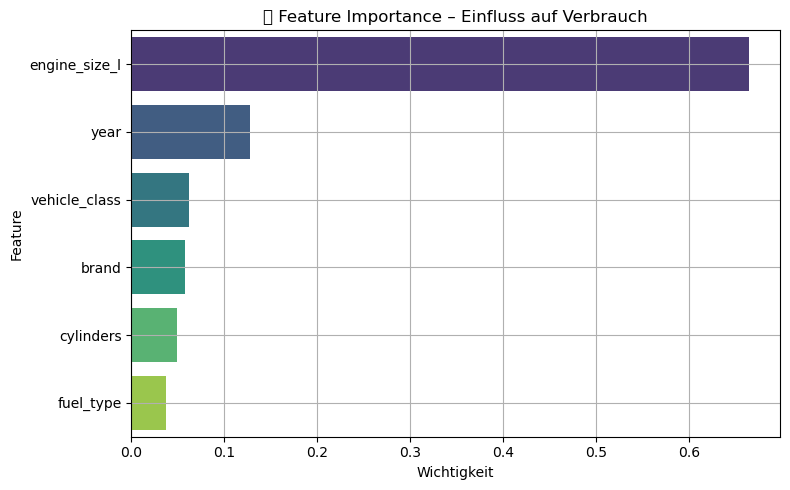

In [41]:
# In DataFrame überführen & sortieren
importance_df = pd.DataFrame({"Feature": features, "Importance": importances})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

# Plot anzeigen
plt.figure(figsize=(8, 5))
sns.barplot(x="Importance", y="Feature", data=importance_df, palette="viridis")
plt.title("🔍 Feature Importance – Einfluss auf Verbrauch")
plt.xlabel("Wichtigkeit")
plt.ylabel("Feature")
plt.tight_layout()
plt.grid(True)
plt.show()
